In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import numpy as np
import scipy.stats as stats

Using matplotlib backend: Qt5Agg


In [2]:
df=pd.read_csv('/home/aditya/Downloads/sales_week.csv')

In [3]:
df1=df.copy()
df1=df1.rename({'"year"':'yr'},axis=1)
df1.shape

(363852, 10)

In [4]:
s=df.isnull().any()
print(s)

item_id            False
store_id           False
week               False
"year"             False
sales_units        False
product_pyramid    False
end_use            False
solid_novelty      False
offer_type         False
color_family       False
dtype: bool


In [5]:
df.dtypes

item_id             int64
store_id            int64
week                int64
"year"              int64
sales_units         int64
product_pyramid    object
end_use            object
solid_novelty      object
offer_type         object
color_family       object
dtype: object

In [6]:
df.head(20)
df=df.rename({'"year"':'yr'},axis=1)

In [7]:
df.head()

,item_id,store_id,week,yr,sales_units,product_pyramid,end_use,solid_novelty,offer_type,color_family
0,5384,7,31,2018,70,Fashion,Career,Footwear,New & Feature,Green
1,5384,7,31,2019,64,Fashion,Career,Footwear,New & Feature,Green
2,5384,7,32,2018,111,Fashion,Career,Footwear,New & Feature,Green
3,5384,7,32,2019,76,Fashion,Career,Footwear,New & Feature,Green
4,5384,7,33,2018,77,Fashion,Career,Footwear,New & Feature,Green


In [8]:
df['product_pyramid'].unique()

array(['Fashion', 'Basic', 'Seasonal Fashion', 'Footwear',
       'Seasonal Basics', 'unknown', 'Accessories'], dtype=object)

In [9]:
x=df['sales_units'].values
df=df.drop('sales_units',axis=1)

In [10]:
print(x)

[ 70  64 111 ...   1   2   2]


In [11]:
df.head(10)

,item_id,store_id,week,yr,product_pyramid,end_use,solid_novelty,offer_type,color_family
0,5384,7,31,2018,Fashion,Career,Footwear,New & Feature,Green
1,5384,7,31,2019,Fashion,Career,Footwear,New & Feature,Green
2,5384,7,32,2018,Fashion,Career,Footwear,New & Feature,Green
3,5384,7,32,2019,Fashion,Career,Footwear,New & Feature,Green
4,5384,7,33,2018,Fashion,Career,Footwear,New & Feature,Green
5,5384,7,33,2019,Fashion,Career,Footwear,New & Feature,Green
6,5384,7,34,2018,Fashion,Career,Footwear,New & Feature,Green
7,5384,7,34,2019,Fashion,Career,Footwear,New & Feature,Green
8,5384,7,35,2018,Fashion,Career,Footwear,New & Feature,Green
9,5384,7,35,2019,Fashion,Career,Footwear,New & Feature,Green


In [12]:
sorted(df.item_id.unique())[-1]

8046

In [13]:
for x in sorted(df1.item_id.unique()[:3]):
    df_item=df1[df1['item_id']==x]
    arr1=df_item['item_id'].values
    arr2=df_item['sales_units'].values
    arr3=df_item['yr'].values
    arr4=df_item['week'].values
    item_values=np.vstack((arr1,arr2,arr3,arr4))
    item_values=item_values.transpose()
    df_newitem=pd.DataFrame(columns=['id','sales','year','week'],data=item_values)
    df_newitem=df_newitem.sort_values(by=['year','week'])
    print(df_newitem.head(25))

      id  sales  year  week
0   1428      3  2018    24
1   1428      3  2018    25
2   1428      2  2018    26
3   1428      5  2018    27
4   1428      1  2018    28
12  1428      1  2018    28
5   1428      1  2018    29
6   1428      3  2018    30
7   1428      2  2018    32
8   1428      1  2018    33
9   1428      2  2018    36
10  1428      1  2018    38
11  1428      1  2018    42
13  1428     19  2018    44
       id  sales  year  week
72   5079      1  2018     1
135  5079      1  2018    15
136  5079      1  2018    16
137  5079      1  2018    17
139  5079      1  2018    18
53   5079      1  2018    19
83   5079      1  2018    19
140  5079      5  2018    19
51   5079     14  2018    20
85   5079     11  2018    20
142  5079      1  2018    20
49   5079     38  2018    21
87   5079     12  2018    21
144  5079      2  2018    21
47   5079     95  2018    22
89   5079     52  2018    22
45   5079     97  2018    23
91   5079     47  2018    23
146  5079      1  2018    23


In [14]:
df['store_id'].unique()

array([ 7,  8, 10,  5,  1,  2,  6,  4,  3,  9])

In [15]:
df_st7=df[df['store_id']==7]

In [16]:
items_store_id=[]
for i in range(1,11):
    items_store_id.append(df[df['store_id']==i].shape[0])
    dftemp=df[df['store_id']==i]
    df_data_2018=dftemp[df['yr']==2018]
    print(i,df_data_2018.shape[0])
    col=dftemp['yr'].unique()
    list_week=sorted(dftemp['week'].unique())
    
    

1 6233
2 4663
3 0
4 3203
5 6533
6 2175
7 68075
8 43987
9 0
10 13424


/home/aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [17]:
print(items_store_id)

[15398, 14089, 8174, 11473, 16986, 5741, 153725, 109048, 6723, 22495]


(array([ 15398.,  14089.,   8174.,  11473.,  16986.,   5741., 153725.,
        109048.,   6723.,  22495.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

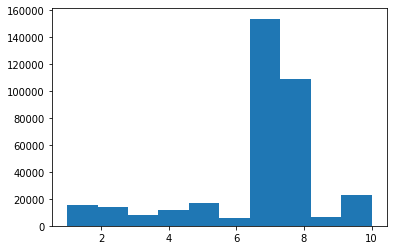

In [18]:
plt.hist(df['store_id'])

In [19]:
item=df['item_id'].unique()
print(item.shape)

(7341,)


In [20]:
df['product_pyramid'].unique()

array(['Fashion', 'Basic', 'Seasonal Fashion', 'Footwear',
       'Seasonal Basics', 'unknown', 'Accessories'], dtype=object)

In [21]:
df['offer_type'].unique()

array(['New & Feature', 'New', 'Accessories', 'Repeat', 'unknown',
       'Relist', 'Footwear', 'Carryover'], dtype=object)

In [22]:
df['solid_novelty'].unique()

array(['Footwear', 'Tonal', 'Print/Pattern', 'Solid', 'Accessories',
       'unknown'], dtype=object)

In [23]:
df['end_use'].unique()

array(['Career', 'Day', 'Casual', 'Accessories', 'Weekend',
       'Special Occasion', 'Footwear', 'Event', 'unknown'], dtype=object)

In [24]:
print(x)
np.mean(x)

5384


5384.0

In [25]:
df1.head()

,item_id,store_id,week,yr,sales_units,product_pyramid,end_use,solid_novelty,offer_type,color_family
0,5384,7,31,2018,70,Fashion,Career,Footwear,New & Feature,Green
1,5384,7,31,2019,64,Fashion,Career,Footwear,New & Feature,Green
2,5384,7,32,2018,111,Fashion,Career,Footwear,New & Feature,Green
3,5384,7,32,2019,76,Fashion,Career,Footwear,New & Feature,Green
4,5384,7,33,2018,77,Fashion,Career,Footwear,New & Feature,Green


In [26]:
stats.f_oneway(df1['sales_units'][df1['offer_type']=='New & Feature'],df1['sales_units'][df1['offer_type']=='New'],df1['sales_units'][df1['offer_type']=='Accessories'],df1['sales_units'][df1['offer_type']=='Repeat'],df1['sales_units'][df1['offer_type']=='unknown'],df1['sales_units'][df1['offer_type']=='Relist'],df1['sales_units'][df1['offer_type']=='Footwear'],df1['sales_units'][df1['offer_type']=='Carryover'])

F_onewayResult(statistic=761.6382451034766, pvalue=0.0)

In [27]:
stats.f_oneway(df1['sales_units'][df1['offer_type']=='New & Feature'],df1['sales_units'][df1['offer_type']=='New'],df1['sales_units'][df1['offer_type']=='Accessories'],df1['sales_units'][df1['offer_type']=='Repeat'],df1['sales_units'][df1['offer_type']=='unknown'],df1['sales_units'][df1['offer_type']=='Relist'],df1['sales_units'][df1['offer_type']=='Footwear'],df1['sales_units'][df1['offer_type']=='Carryover'])

F_onewayResult(statistic=761.6382451034766, pvalue=0.0)

In [28]:
print(df1['sales_units'][df1['offer_type']=='New & Feature'].values)
col_color=df['color_family'].unique()
col_novelty=df['solid_novelty'].unique()
col_type=df['offer_type'].unique()
col_prod=df['product_pyramid'].unique()
col_end=df['end_use'].unique()
col_list=[col_color,col_novelty,col_type,col_prod,col_end]
columns=['color_family','solid_novelty','offer_type','product_pyramid','end_use']
#col_novelty=df['color_family'].unique()


[ 70  64 111 ...   1   1   1]


In [29]:
ls=[]
for l,i in zip(col_list,columns):
    ls=[]
    for x in l:
        ls.append(df1['sales_units'][df1[i]==x])
    print('F value for',i,'is',stats.f_oneway(*ls)[0])

F value for color_family is 290.74702987189005
F value for solid_novelty is 805.2204780475294
F value for offer_type is 761.6382451034766
F value for product_pyramid is 901.0114019427365
F value for end_use is 547.9416220329869


In [30]:
#These F-values are used to order the attributes in terms of importance.
#Hence, product_pyramid affects the output of sales the most.